In [51]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

#  2. Active Learning Using Support Vector Machines

## a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [2]:
df = pd.read_csv('../data/banknote.txt',names = ['variance','skewness','curtosis','entropy','class']) 

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['class']),df['class'],
                                                    test_size = 472/(472+900),stratify = df['class'],random_state = 3)
for i in x_train, x_test, y_train, y_test:
    i.reset_index(drop = True, inplace = True)
#train = pd.concat([x_train,y_train],axis=1)


## (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [4]:
from sklearn.utils.random import sample_without_replacement

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [6]:
passive_error_dict = {}

for rs in range(50):
    x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['class']),df['class'],
                                                        test_size = 472/(472+900),stratify = df['class'],random_state = 3)
    for i in x_train, x_test, y_train, y_test:
        i.reset_index(drop = True, inplace = True)

    x_poll = pd.DataFrame(None,columns = ['variance','skewness','curtosis','entropy'])
    y_poll = [ ]
    passive_error_list = []
    
    while len(x_train.index.tolist())>0:
        ind = np.random.choice(x_train.index.tolist(),size = 10, replace = False).tolist()
    
        x_poll = x_poll.append(x_train.loc[ind])
        for i in y_train.loc[ind].tolist():
            y_poll.append(i)
    
        clf = svm.LinearSVC(penalty = 'l1', dual=False)
        C_list = [10** i for i in range(-3,6)]
        params = {'C':C_list}
        grid = GridSearchCV(svm.LinearSVC(penalty = 'l1', dual=False), param_grid = params, cv = 5)
        grid.fit(x_poll, y_poll)
        pred = grid.predict(x_test)
        error = 1-accuracy_score(y_test,pred)
        passive_error_list.append(error)
    
        x_train.drop(ind,inplace=True)
        y_train.drop(ind,inplace= True)
    passive_error_dict [rs] = passive_error_list
print('Done')

********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
****************************

In [13]:
passive_error_df = pd.DataFrame.from_dict(passive_error_dict, orient = 'index')#.transpose()
passive_error_df.columns = range(10,910,10)
passive_error_df

,10,20,30,40,50,60,70,80,90,100,...,810,820,830,840,850,860,870,880,890,900
0,0.148305,0.038136,0.036017,0.036017,0.012712,0.036017,0.033898,0.033898,0.036017,0.036017,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,0.048729,0.044492,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
2,0.258475,0.101695,0.055085,0.002119,0.019068,0.019068,0.023305,0.027542,0.021186,0.021186,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
3,0.260593,0.069915,0.050847,0.008475,0.019068,0.016949,0.025424,0.021186,0.021186,0.021186,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
4,0.031780,0.033898,0.019068,0.008475,0.008475,0.021186,0.021186,0.023305,0.012712,0.010593,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
5,0.148305,0.023305,0.023305,0.021186,0.021186,0.025424,0.025424,0.021186,0.025424,0.025424,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
6,0.040254,0.069915,0.023305,0.021186,0.014831,0.014831,0.014831,0.014831,0.025424,0.019068,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
7,0.216102,0.021186,0.010593,0.008475,0.008475,0.021186,0.021186,0.021186,0.021186,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
8,0.080508,0.065678,0.036017,0.025424,0.036017,0.027542,0.014831,0.021186,0.021186,0.021186,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
9,0.019068,0.019068,0.048729,0.048729,0.044492,0.025424,0.008475,0.027542,0.023305,0.023305,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475


### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [44]:
active_error_dict = {}

k = 0
for rs in range(50):
    x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['class']),df['class'],
                                                        test_size = 472/(472+900),stratify = df['class'],random_state = 3)
    for i in x_train, x_test, y_train, y_test:
        i.reset_index(drop = True, inplace = True)
    
    
    x_poll = pd.DataFrame(None,columns = ['variance','skewness','curtosis','entropy'])
    y_poll = [ ]
    active_error_list = []
    
    ind = np.random.choice(range(0,len(x_train)),size = 10, replace = False)#.tolist()
    x_poll = x_poll.append(x_train.loc[ind])
    for i in y_train.loc[ind].tolist():
        y_poll.append(i)
        
    x_train.drop(ind,inplace=True)
    y_train.drop(ind,inplace= True)
    
    
    #print(len(x_train),len(y_train))
      
    while len(x_train.index.tolist()) > 0:
        x_train.reset_index(drop = True, inplace = True)
        y_train.reset_index(drop = True, inplace = True)
        
        clf = svm.LinearSVC(penalty = 'l1', dual=False)
        C_list = [10** i for i in range(-3,6)]
        params = {'C':C_list}
        grid = GridSearchCV(svm.LinearSVC(penalty = 'l1', dual=False), param_grid = params, cv = 5)
        grid.fit(x_poll, y_poll)
        pred = grid.predict(x_test)
        error = 1-accuracy_score(y_test,pred)
        active_error_list.append(error)
        
        abs_dists = np.abs(grid.decision_function(x_train))
        index = abs_dists.argsort()[:10]
        
        x_poll = x_poll.append(x_train.loc[index])
        for i in y_train.loc[index].tolist():
            y_poll.append(i)
    
        x_train.drop(index,inplace=True)
        y_train.drop(index,inplace= True)
        
    clf = svm.LinearSVC(penalty = 'l1', dual=False)
    C_list = [10** i for i in range(-3,6)]
    params = {'C':C_list}
    grid = GridSearchCV(svm.LinearSVC(penalty = 'l1', dual=False), param_grid = params, cv = 5)
    grid.fit(x_poll, y_poll)
    pred = grid.predict(x_test)
    error = 1-accuracy_score(y_test,pred)
    active_error_list.append(error)
        
    active_error_dict [rs] = active_error_list 
    
    k+=1
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [45]:
active_error_df = pd.DataFrame.from_dict(active_error_dict, orient = 'index')#.transpose()
active_error_df.columns = range(10,910,10)
active_error_df

,10,20,30,40,50,60,70,80,90,100,...,810,820,830,840,850,860,870,880,890,900
0,0.330508,0.080508,0.014831,0.010593,0.004237,0.008475,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,0.074153,0.095339,0.012712,0.016949,0.002119,0.004237,0.021186,0.010593,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
2,0.146186,0.014831,0.008475,0.019068,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.014831
3,0.025424,0.120763,0.072034,0.048729,0.033898,0.014831,0.008475,0.008475,0.008475,0.008475,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
4,0.150424,0.091102,0.033898,0.019068,0.002119,0.021186,0.008475,0.008475,0.008475,0.014831,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
5,0.139831,0.033898,0.055085,0.031780,0.025424,0.021186,0.014831,0.008475,0.014831,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.014831,0.014831,0.014831,0.014831
6,0.148305,0.027542,0.040254,0.000000,0.008475,0.021186,0.010593,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
7,0.097458,0.029661,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
8,0.091102,0.029661,0.074153,0.012712,0.010593,0.008475,0.008475,0.008475,0.008475,0.021186,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
9,0.029661,0.095339,0.023305,0.008475,0.046610,0.010593,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.014831


## (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

90


<Figure size 432x468 with 0 Axes>

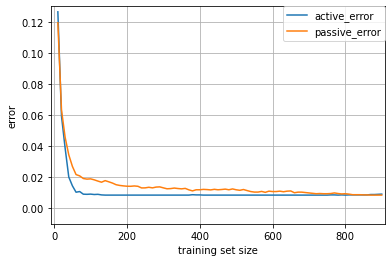

In [66]:
plt.figure(figsize=(6, 6.5))
fig,ax = plt.subplots()

plt.xlabel('training set size')
plt.ylabel('error')

ax.set_ylim([-0.01,0.13])
ax.set_xlim([-10,910])


x = range(10,910,10)
y = active_error_df.mean().tolist()
z = passive_error_df.mean().tolist()
print(len(x))
plt.plot(x,y,'-', label = 'active_error' )
plt.plot(x,z,'-', label = 'passive_error')



plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
 
plt.show()


Conclusion
For this specific dataset, active learner performs slightly better than passive learner. The error plot shows that when the training set size increase to about 100, the error decreases sharply.
Generally speaking, both active learner and passive learner perform well on the dataset since error is always lower than 0.02 when training set size is bigger than 100.